In [1]:
import hail as hl
import matplotlib.pyplot as plt

Loading BokehJS ...

In [2]:
vcf_file='gnomad.genomes.v3.1.2.sites.chrY.vcf.bgz'
reference_genome = hl.get_reference('GRCh37')
mt= hl.import_vcf(vcf_file, reference_genome=reference_genome, contig_recoding={'chrY': 'Y'})

Initializing Hail with default parameters...
SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See https://www.slf4j.org/codes.html#noProviders for further details.
SLF4J: Class path contains SLF4J bindings targeting slf4j-api versions 1.7.x or earlier.
SLF4J: Ignoring binding found at [jar:file:/home/kushal/.local/lib/python3.10/site-packages/pyspark/jars/log4j-slf4j-impl-2.17.2.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See https://www.slf4j.org/codes.html#ignoredBindings for an explanation.
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
Running on Apache Spark version 3.3.0
SparkUI available at http://192.168.0.108:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.124-13536b531342
LOGGING: writing to /home/kushal/Desktop/Prospace/hail-20231015-0207-0.2.124-13536b531342.log


In [3]:
mt.show(20)

2023-10-15 02:07:45.626 Hail: INFO: scanning VCF for sortedness...
2023-10-15 02:08:07.753 Hail: INFO: Coerced sorted VCF - no additional import work to do


,
locus,alleles
locus<GRCh37>,array<str>
Y:2781489,"[""C"",""T""]"
Y:2781499,"[""C"",""A""]"
Y:2781511,"[""C"",""G""]"
Y:2781514,"[""C"",""A""]"
Y:2781520,"[""G"",""C""]"
Y:2781522,"[""G"",""C""]"
Y:2781554,"[""G"",""A""]"
Y:2781557,"[""C"",""G""]"


In [4]:
mt.describe()

----------------------------------------
Global fields:
    None
----------------------------------------
Column fields:
    's': str
----------------------------------------
Row fields:
    'locus': locus<GRCh37>
    'alleles': array<str>
    'rsid': str
    'qual': float64
    'filters': set<str>
    'info': struct {
        AC: array<int32>, 
        AN: int32, 
        AF: array<float64>, 
        popmax: array<str>, 
        faf95_popmax: array<float64>, 
        AC_non_v2_XX: array<int32>, 
        AN_non_v2_XX: int32, 
        AF_non_v2_XX: array<float64>, 
        nhomalt_non_v2_XX: array<int32>, 
        AC_non_cancer_fin_XX: array<int32>, 
        AN_non_cancer_fin_XX: int32, 
        AF_non_cancer_fin_XX: array<float64>, 
        nhomalt_non_cancer_fin_XX: array<int32>, 
        AC_non_neuro_nfe: array<int32>, 
        AN_non_neuro_nfe: int32, 
        AF_non_neuro_nfe: array<float64>, 
        nhomalt_non_neuro_nfe: array<int32>, 
        AC_non_neuro_afr_XY: array<int32>, 

In [5]:
rows= mt.count_rows()
print(rows)

1167367


In [6]:
colum= mt.count_cols()
print(colum)

0


In [7]:
mt.count()

(1167367, 0)

In [8]:
mt.s.show()

""
s
str


In [9]:
mt.filters.show()

,,
locus,alleles,filters
locus<GRCh37>,array<str>,set<str>
Y:2781489,"[""C"",""T""]","{""AC0""}"
Y:2781499,"[""C"",""A""]","{""AC0""}"
Y:2781511,"[""C"",""G""]","{""AC0""}"
Y:2781514,"[""C"",""A""]","{""AC0"",""AS_VQSR""}"
Y:2781520,"[""G"",""C""]","{""AC0"",""AS_VQSR""}"
Y:2781522,"[""G"",""C""]","{""AC0""}"
Y:2781554,"[""G"",""A""]",{}
Y:2781557,"[""C"",""G""]","{""AC0"",""AS_VQSR""}"


In [10]:
# Calculate allele frequencies and add a new column 'AF' to the MatrixTable
mt = mt.annotate_rows(
    AF=hl.cond(
        hl.is_defined(mt.info.AC) & hl.is_defined(mt.info.AN),
        hl.float64(mt.info.AC[0]) / hl.float64(mt.info.AN),
        0.0  # Set frequency to 0 if AC and AN are not defined
    )
)


/tmp/ipykernel_5805/1801184380.py:3: DeprecationWarning:

Call to deprecated function (or staticmethod) cond. (Replaced by hl.if_else) -- Deprecated since version 0.2.59.



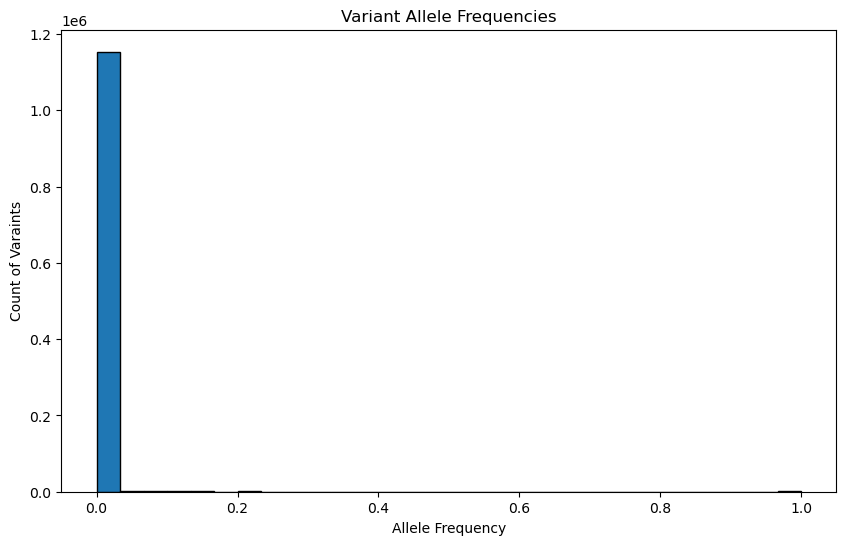

In [11]:
import matplotlib.pyplot as plt

# Extract allele frequencies from the MatrixTable
allele_frequencies = mt.AF.collect()

# Plotting the allele frequencies
plt.figure(figsize=(10, 6))
plt.hist(allele_frequencies, bins=30, edgecolor='black')
plt.xlabel('Allele Frequency')
plt.ylabel('Count of Varaints')
plt.title('Variant Allele Frequencies')
plt.show()


The x-axis of the plot represents the allele frequencies (ranging from 0 to 1).


The y-axis represents the count of variants that fall into each frequency bin.


Each bar in the histogram represents a range of allele frequencies, and the height of the bar indicates how many variants have allele frequencies within that range.

To find maximum AF:- 

In [12]:
max_af=max(allele_frequencies)
print(f"Maximum Allele Frequency is: {max_af}")

Maximum Allele Frequency is: 1.0
